---
---

# **1 - Heart Disease Data Set**

**Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


**Data**

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

**Content**

Attribute Information:

    * age: age in years
    * sex: sex (1 = male; 0 = female) 
    * cp: chest pain type
      - Value 1: typical angina
      - Value 2: atypical angina
      - Value 3: non-anginal pain
      - Value 4: asymptomatic 
    * trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    * chol: serum cholestoral in mg/dl 
    * fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * restecg: resting electrocardiographic results
      - Value 0: normal
      - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    * thalach: maximum heart rate achieved 
    * exang: exercise induced angina (1 = yes; 0 = no)
    * oldpeak = ST depression induced by exercise relative to rest
    * slope: the slope of the peak exercise ST segment
      - Value 1: upsloping
      - Value 2: flat
      - Value 3: downsloping 
    * ca: number of major vessels (0-3) colored by flourosopy 
    * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    * target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Heart_Disease_Prediction/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df.shape

(303, 14)

---
---

# **2 - Exploratory Data Analysis and Visualization**

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The Dataset has no missing value

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


---

### **a. Label Distribution**

**Create a bar plot that shows the total counts per target value.**

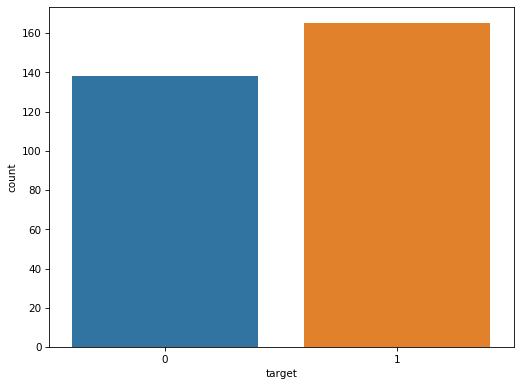

In [ ]:
plt.figure(figsize=(8,6), dpi=75)
sns.countplot(data=df, x='target')
plt.show()

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The label has near balanced distribution

---

### **b. Features Relationships**

**Create a pairplot that displays the features relationships**


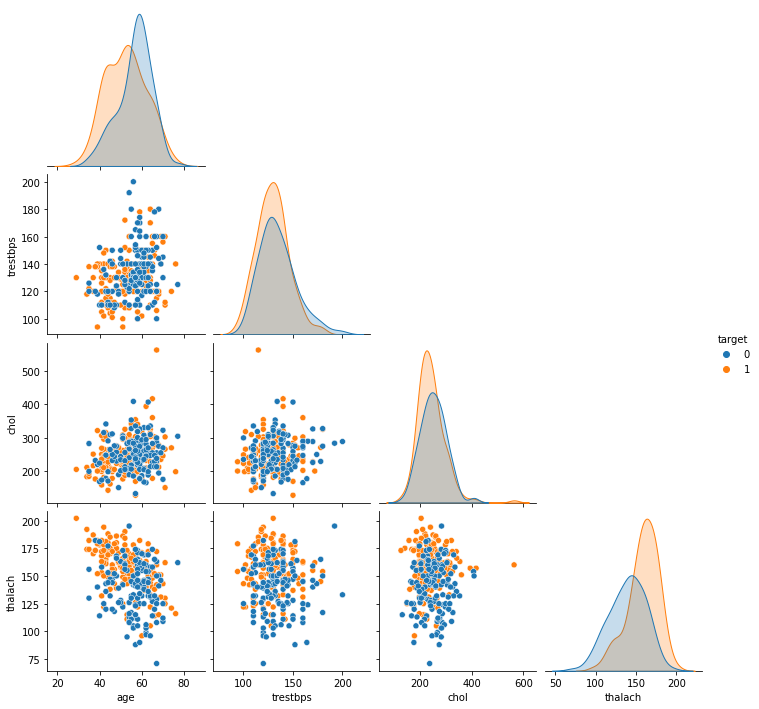

In [ ]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target', corner=True)
plt.show()

trestbps and chol has overlapping disribution per class so its harder to distinguished. Let check the correlation instead

---

### **c. Features Correlation**

**Create a heatmap that displays the correlation between all the columns.**

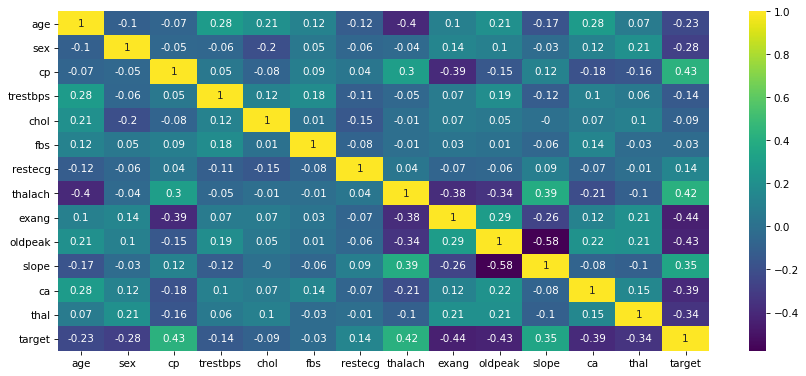

In [ ]:
plt.figure(figsize=(14,6),dpi=75)
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
plt.show()

Based on image above, the features cp, thalach and slope has better impact on detecting presence of heart disease

In [ ]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

---
---

# **3 - Logistic Regression**

## **A. Setup**

### **a. Train | Test Split**

**Separate the features from the labels into 2 objects, X and y.**

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
X_train.shape

(272, 13)

In [ ]:
X_test.shape

(31, 13)

---

### **b. Scaling the Data**
**Rescale data to have mean (u) of 0 and standard deviation of 1**

**Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit and Transform training data
# (fit is to calculate statistical information)
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
# Transform test data
scaled_X_test = scaler.transform(X_test)

---

## **B. Create Estimator/Model**

**Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
base_log_model = LogisticRegression(solver='saga', max_iter=5000)

In [ ]:
# help(LogisticRegressionCV)

In [ ]:
# logCV_model = LogisticRegressionCV()

---

#### **a. GridSearch for Best Hyper-Parameters**

Main parameter choices are regularization penalty choice and regularization C value.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Penalty Type (Regularization)
penalty = ['elasticnet','l1','l2']
l1_ratio = np.linspace(0,1,20) # for elastic net

'''
np.logspace -> Return numbers spaced evenly on a log scale.
Use logarithmically spaced C values (recommended in official docs)
Smaller values specify stronger regularization
'''
C = np.logspace(0, 10, 20) # 10^0 to 10^10

In [ ]:
param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

**Scoring Paramater:**

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
grid_log_model = GridSearchCV(base_log_model, 
                              param_grid=param_grid,
                              scoring='f1',
                              cv = 5,
                              verbose=0)

---

### **b. Fit/Train Model**

**Report back your search's optimal parameters, specifically the C value.** 



In [ ]:
grid_log_model.fit(scaled_X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio paramete

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 3.3...
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.684

In [ ]:
#logCV_model.fit(scaled_X_train, y_train)

In [ ]:
# Use this setting for final model
grid_log_model.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.0, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
grid_log_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

---

### **c. Coefficients**

**Report back the model's coefficients.**

In [ ]:
# logCV_model.Cs_

In [ ]:
# logCV_model.C_

In [ ]:
# logCV_model.get_params()

In [ ]:
grid_log_model.best_estimator_.coef_

array([[-0.04784855, -0.69649279,  0.88804064, -0.23903697, -0.18650849,
         0.00234536,  0.09604266,  0.42196045, -0.4086474 , -0.52460245,
         0.35763112, -0.83234807, -0.56451969]])

In [ ]:
coef_val = pd.Series(grid_log_model.best_estimator_.coef_[0], index=X.columns).sort_values()
coef_val

ca         -0.832348
sex        -0.696493
thal       -0.564520
oldpeak    -0.524602
exang      -0.408647
trestbps   -0.239037
chol       -0.186508
age        -0.047849
fbs         0.002345
restecg     0.096043
slope       0.357631
thalach     0.421960
cp          0.888041
dtype: float64

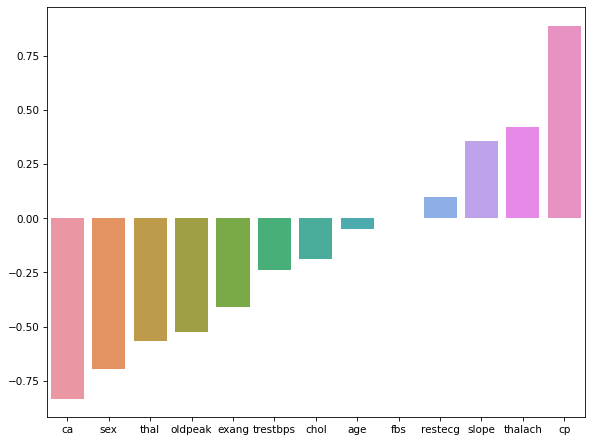

In [ ]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=coef_val.index, y=coef_val.values)
plt.tight_layout()
plt.show()

So the the people who has higher likelihood on having disease is has higher restecg, slope, thalach and cp.

---


## **C. Performance Evaluation using Hold-Out Data**

### **a. Classification Metrics on Test Set**

**Let's now evaluate your model on the remaining 10% of the data, the test set.**


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [ ]:
y_pred = grid_log_model.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

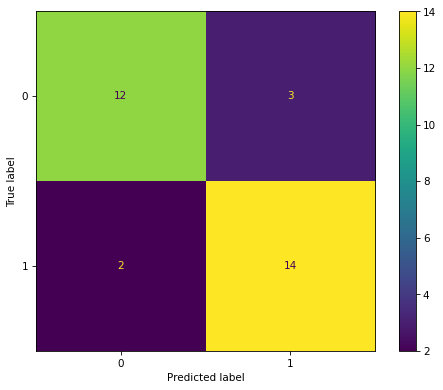

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_log_model, scaled_X_test, y_test, ax=ax)
plt.show()

The model has good performance but beware of the False Positive, because 2 test data in True Label 1 is predicted likelihood not having disease, so it is need thorough check-up on people who predicted as Predicted Label 0.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



The model has good metrics performance, balanced in precision and recall

---

### **b. Performance Curves**

**Create both the precision recall curve and the ROC Curve.**

In [ ]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

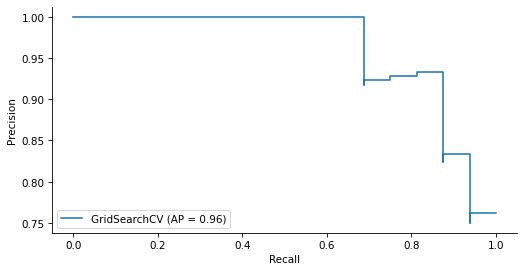

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_precision_recall_curve(grid_log_model, scaled_X_test, y_test, ax=ax)
sns.despine() # Remove border from graph
plt.show()

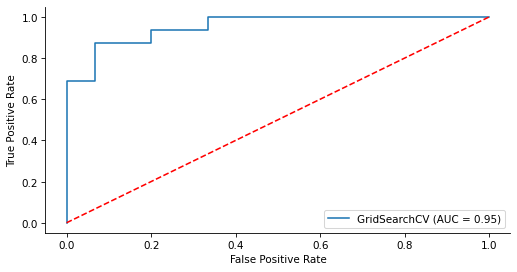

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_roc_curve(grid_log_model, scaled_X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--')
sns.despine()
plt.show()

---
---



# **4 - Finalize Model**

## **A. Re-Train/Fit Model on All Data**

**NOTE: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).**

**Using best estimators from Grid Search, we Re-Train all data:**

In [ ]:
final_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=0.0, max_iter=5000,
                                 multi_class='auto', n_jobs=None, penalty='l1',
                                 random_state=None, solver='saga', tol=0.0001, verbose=0,
                                 warm_start=False)

In [ ]:
final_model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.0, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
final_model.coef_

array([[ 4.39141828e-04, -3.32039682e-01,  5.48511646e-01,
        -1.57612624e-02, -2.44632325e-03,  0.00000000e+00,
         8.66670511e-02,  2.67848906e-02, -2.57942119e-01,
        -4.47954788e-01,  1.64558322e-01, -4.76020634e-01,
        -3.79128112e-01]])

---

## **B. Saving the Model**

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, '/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Heart_Disease_Prediction/heart_disease_log_model.joblib') 

['/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Heart_Disease_Prediction/heart_disease_log_model.joblib']

---

## **C. Prediction on New Data**

**A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

In [ ]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [ ]:
#scaled_patient = scaler.transform(patient)

In [ ]:
loaded_model = load('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Heart_Disease_Prediction/heart_disease_log_model.joblib')

In [ ]:
# Class to be predicted
loaded_model.classes_

array([0, 1])

In [ ]:
loaded_model.predict(patient)

array([0])

In [ ]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)
loaded_model.predict_proba(patient)

array([[0.95571027, 0.04428973]])

---
---